# Main Jupyter Notebook

## Data preparation

In [1]:
from importnb import imports
with imports("ipynb"):
    from common.functions import (
        load_dataset,
        load_parameters,
        clean_up_dataset,
        print_feature_outliers,
        remove_outliers,
        generate_numerical_eda_visualization,
        generate_numerical_heatmap,
        generate_numerical_categorical_heatmap,
        generate_categorical_count_visualization,
        generate_numerical_vs_categorical_eda_visualization,
        generate_time_series_visualization
    )

In [2]:
parameters = load_parameters(".")
# print(parameters)

In [3]:
DatasetRaw = load_dataset(parameters['load_dataset_parameters'])
DatasetRaw.info()
DatasetRaw.head(5)
# DatasetRaw.to_csv("mixed_remaining_lease_type.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190045 entries, 0 to 190044
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                190045 non-null  datetime64[ns]
 1   town                 190045 non-null  category      
 2   flat_type            190045 non-null  category      
 3   block                190045 non-null  string        
 4   street_name          190045 non-null  string        
 5   storey_range         190045 non-null  category      
 6   floor_area_sqm       190045 non-null  int64         
 7   flat_model           190045 non-null  category      
 8   lease_commence_date  190045 non-null  int64         
 9   remaining_lease      190045 non-null  string        
 10  resale_price         190045 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(3), string(3)
memory usage: 10.9 MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979,61 years 04 months,232000
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978,60 years 07 months,250000
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,262000
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980,62 years 01 month,265000
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,265000


## Data Cleanup

In [4]:
CleanUpDataset = clean_up_dataset(DatasetRaw, parameters['cleanup_parameters'])
CleanUpDataset.info()
CleanUpDataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190045 entries, 0 to 190044
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   month            190045 non-null  datetime64[ns]
 1   town             190045 non-null  category      
 2   flat_type        190045 non-null  category      
 3   storey_range     190045 non-null  category      
 4   floor_area_sqm   190045 non-null  int64         
 5   flat_model       190045 non-null  category      
 6   remaining_lease  190045 non-null  int64         
 7   resale_price     190045 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(3)
memory usage: 6.5 MB


,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,10 TO 12,44,Improved,61,232000
1,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67,New Generation,60,250000
2,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67,New Generation,62,262000
3,2017-01-01,ANG MO KIO,3 ROOM,04 TO 06,68,New Generation,62,265000
4,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67,New Generation,62,265000


In [5]:
CleanUpDataset.describe()

,month,floor_area_sqm,remaining_lease,resale_price
count,190045,190045.000000,190045.000000,1.900450e+05
mean,2019-07-02 18:41:38.755557888,97.417138,74.214481,4.730579e+05
min,2015-01-01 00:00:00,31.000000,42.000000,1.400000e+05
25%,2017-07-01 00:00:00,82.000000,64.000000,3.550000e+05
50%,2019-09-01 00:00:00,94.000000,74.000000,4.400000e+05
75%,2021-08-01 00:00:00,112.000000,85.000000,5.580000e+05
max,2023-05-01 00:00:00,280.000000,97.000000,1.418000e+06
std,NaN,24.090047,13.210839,1.621003e+05


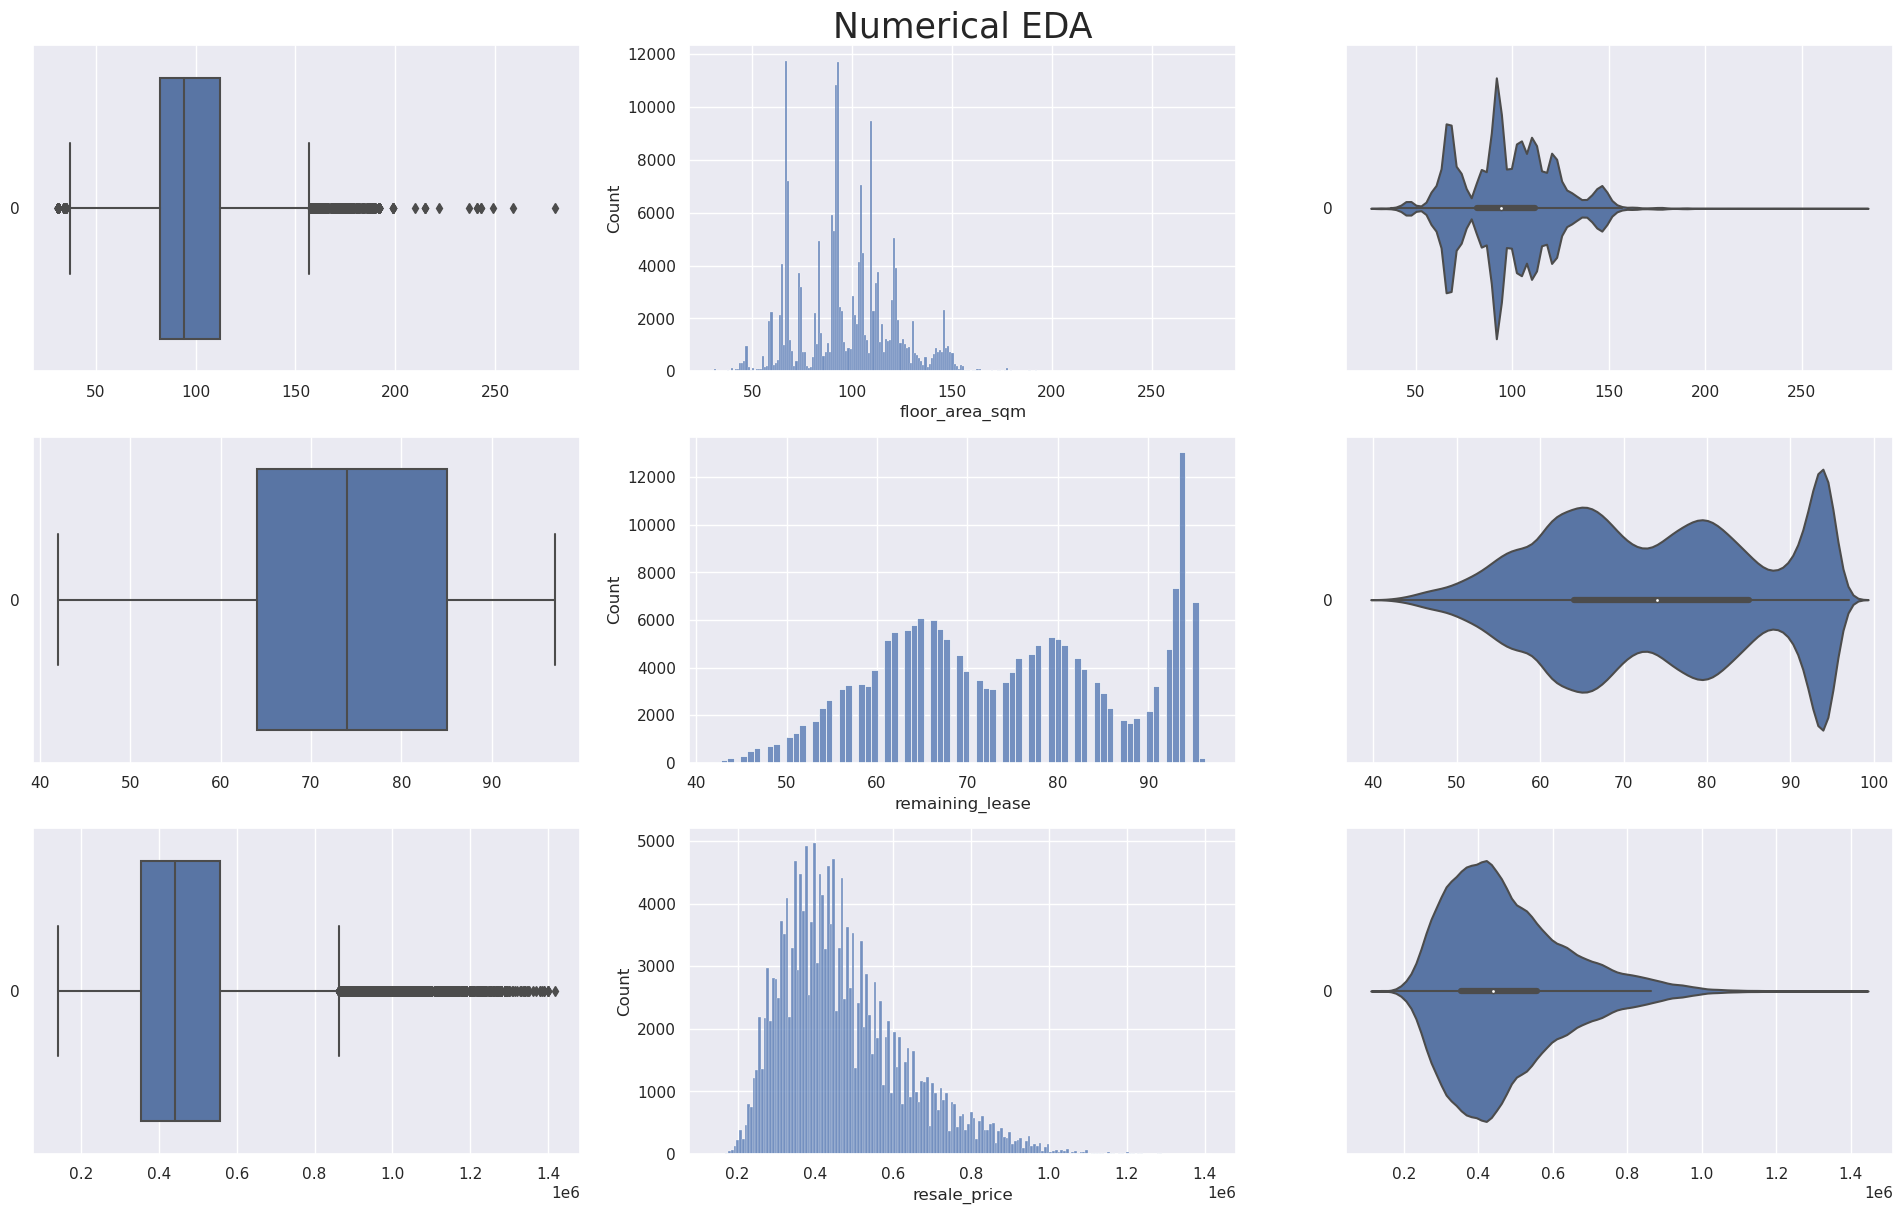

In [6]:
generate_numerical_eda_visualization(CleanUpDataset, "Numerical EDA")

In [7]:
print_feature_outliers(CleanUpDataset)

[floor_area_sqm] total outliers: 1130
[remaining_lease] total outliers: 0
[resale_price] total outliers: 5145


In [8]:
RemovedOutlierDataset = remove_outliers(CleanUpDataset)
RemovedOutlierDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184010 entries, 0 to 184009
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   month            184010 non-null  datetime64[ns]
 1   town             184010 non-null  category      
 2   flat_type        184010 non-null  category      
 3   storey_range     184010 non-null  category      
 4   floor_area_sqm   184010 non-null  int64         
 5   flat_model       184010 non-null  category      
 6   remaining_lease  184010 non-null  int64         
 7   resale_price     184010 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(3)
memory usage: 6.3 MB


## Correlation of dataframe features

In [9]:
# generate_numerical_categorical_heatmap(CleanUpDataset)

In [10]:
# generate_numerical_categorical_heatmap(RemovedOutlierDataset)

In [11]:
# generate_numerical_heatmap(RemovedOutlierDataset, "Numerical Heatmap")

## Simple Exploratory Data Analysis

In [12]:
# generate_numerical_eda_visualization(RemovedOutlierDataset, "Numerical EDA")

In [13]:
# generate_categorical_count_visualization(RemovedOutlierDataset, parameters['categorical_count_visualization_parameters'])

In [14]:
# generate_numerical_vs_categorical_eda_visualization(
#     RemovedOutlierDataset, 
#     parameters['numerical_vs_categorical_eda_visualization_parameters'], 
#     '[UNION outliers removed] num_subscriber VS category'
# )

## Time series graph

In [15]:
test_df = generate_time_series_visualization(RemovedOutlierDataset, parameters['time_series_parameters'])
# test_df.head(5)
# test_df.to_csv("split_dataframe.csv") # this is okay so far
# test_df.to_csv("split_dataframe_group_angmokio.csv") # this is okay so far
# test_df.to_csv("split_dataframe_group_angmokio_group_date_max_resale.csv") # this is okay so far

Dataframe by split
Dataframe by group
Dataframe group date by max
Series to Dataframe
<class 'pandas.core.frame.DataFrame'>



AttributeError: 'NoneType' object has no attribute 'head'

## Linear regression